In [28]:
#dependencies
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split , cross_val_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,  plot_roc_curve , classification_report , accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn


In [29]:
#import data
df = pd.read_csv("data/spam_or_not_spam.csv")

df.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [30]:
#remove NAs
df.dropna(inplace =  True)

In [31]:
#labels and mail
X =  df.iloc[:,0].values
y = df.iloc[:,-1].values

In [34]:
# return each mail to its original
nltk.download('stopwords')
corpus =[]
for i in range(len(X)):
    stemmer = PorterStemmer()
    X[i] = X[i].lower()
    X[i] = X[i].split()
    email =  [stemmer.stem(J) for J in X[i] ]
    email = ' '.join(email)
    corpus.append(email)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
v = CountVectorizer()
X = v.fit_transform(corpus).toarray()

In [36]:
#test_train split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [37]:
# cross_val_score of svc
svc  =  SVC()
score_1 = cross_val_score(svc,X_train,y_train,cv = 10 )
score_1 

array([0.90416667, 0.94583333, 0.94166667, 0.95      , 0.94583333,
       0.95416667, 0.9375    , 0.94166667, 0.93333333, 0.94979079])

In [38]:
#mean of score_1
score_1.mean()

0.9403957461645748

In [39]:
rf  =  RandomForestClassifier(n_estimators= 120)
score_2 = cross_val_score(rf,X_train,y_train,cv = 10 )
score_2 

array([0.95833333, 0.97916667, 0.97916667, 0.99166667, 0.97083333,
       0.975     , 0.975     , 0.975     , 0.98333333, 0.9832636 ])

In [16]:
score_2.mean()

0.975826359832636

In [40]:
#Model Training
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.985


In [45]:
#classification report
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.99      0.92      0.95       100

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.98      0.98       600



[[499   1]
 [  8  92]]


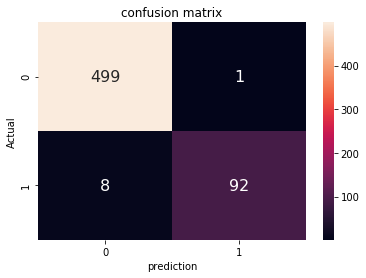

In [46]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [47]:
probs = rf.predict_proba(X_test)

probs

array([[0.95      , 0.05      ],
       [0.925     , 0.075     ],
       [0.99166667, 0.00833333],
       ...,
       [0.95      , 0.05      ],
       [0.18333333, 0.81666667],
       [1.        , 0.        ]])

In [67]:
Cols = ["HamProb","SpamProb"]
results = pd.DataFrame(probs,columns = Cols)

# results["ID"] = results.index + 1

results

,HamProb,SpamProb
0,0.950000,0.050000
1,0.925000,0.075000
2,0.991667,0.008333
3,0.991667,0.008333
4,0.958333,0.041667
...,...,...
595,0.716667,0.283333
596,0.916667,0.083333
597,0.950000,0.050000
598,0.183333,0.816667


In [76]:
results.sort_values('SpamProb', ascending = False).head(30)
    

,HamProb,SpamProb
307,0.000000,1.000000
215,0.000000,1.000000
113,0.000000,1.000000
187,0.000000,1.000000
419,0.000000,1.000000
166,0.000000,1.000000
499,0.000000,1.000000
428,0.008333,0.991667
95,0.008333,0.991667
587,0.008333,0.991667
